In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix
from keras import optimizers
from sklearn.metrics import confusion_matrix

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
df.iloc[:, -7:] = df.iloc[:, -7:].astype("int64")

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")
sifir_bir_duzelt("ortaokul_kurs")
sifir_bir_duzelt("ortaokul_ozelders")

In [ ]:
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,56,55,68,70,74
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,58,48,67,71,74
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,81,87,83,86,40
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,51,33,63,61,62
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,72,58,69,70,77


In [ ]:
x_reduced_col_names = df.corr().abs()["ort11"].nlargest(10).index
df[x_reduced_col_names].corr()

,ort11,ort10,turkce9,mat9,lgs_puani,ortaokul_puani,ders_calisma,ort9,cinsiyet,oyun
ort11,1.000000,0.812049,0.620896,0.564581,0.548735,0.470903,0.318021,0.316828,-0.206806,-0.176105
ort10,0.812049,1.000000,0.685016,0.683687,0.663147,0.536872,0.335561,0.399940,-0.172304,-0.177935
turkce9,0.620896,0.685016,1.000000,0.582684,0.524121,0.457950,0.297209,0.328033,-0.201619,-0.203641
mat9,0.564581,0.683687,0.582684,1.000000,0.567203,0.446324,0.256546,0.325642,-0.071236,-0.088728
lgs_puani,0.548735,0.663147,0.524121,0.567203,1.000000,0.743584,0.230925,0.444281,-0.013302,-0.071469
ortaokul_puani,0.470903,0.536872,0.457950,0.446324,0.743584,1.000000,0.240453,0.234425,-0.064464,-0.076150
ders_calisma,0.318021,0.335561,0.297209,0.256546,0.230925,0.240453,1.000000,0.130239,-0.260115,-0.266336
ort9,0.316828,0.399940,0.328033,0.325642,0.444281,0.234425,0.130239,1.000000,-0.078768,-0.069294
cinsiyet,-0.206806,-0.172304,-0.201619,-0.071236,-0.013302,-0.064464,-0.260115,-0.078768,1.000000,0.425190
oyun,-0.176105,-0.177935,-0.203641,-0.088728,-0.071469,-0.076150,-0.266336,-0.069294,0.425190,1.000000


In [ ]:
x = df[x_reduced_col_names]
x.dtypes

ort11             int64
ort10             int64
turkce9           int64
mat9              int64
lgs_puani         int64
ortaokul_puani    int64
ders_calisma      int64
ort9              int64
cinsiyet          int64
oyun              int64
dtype: object

In [ ]:
x.shape

(1084, 10)

In [ ]:
df_train = x.iloc[:800, :]
df_test = x.iloc[800:, :]

In [ ]:
x_train = df_train[df_train.columns.difference(['ort11'])].values
y_train = df_train[['ort11']].values
x_test = df_test[df_test.columns.difference(['ort11'])].values

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)

In [ ]:
x_test

array([[-6.80090326e-01, -1.04151616e+00,  6.20336558e-01, ...,
        -1.10093874e+00,  1.19455017e+00, -1.02055782e+00],
       [-6.80090326e-01,  1.94491011e+00,  3.39366785e-01, ...,
         2.91993400e-01,  1.20797208e-01, -1.49258302e+00],
       [ 1.47039292e+00, -4.60407384e-02,  9.01306330e-01, ...,
         2.91993400e-01,  1.19455017e+00, -2.35796255e+00],
       ...,
       [ 1.47039292e+00,  9.49434687e-01,  1.86110546e-01, ...,
         7.09873041e-01, -9.52955750e-01,  1.59505182e-01],
       [-6.80090326e-01, -4.60407384e-02,  1.09482426e-01, ...,
         9.88459469e-01, -9.52955750e-01,  2.16344883e-03],
       [ 1.47039292e+00, -4.60407384e-02,  7.99135504e-01, ...,
         9.88459469e-01,  1.20797208e-01,  3.16846915e-01]])

In [ ]:
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=42)

In [ ]:
x_train

array([[-6.80090326e-01, -4.60407384e-02, -6.56798771e-01, ...,
         7.09873041e-01,  2.26830312e+00, -9.41886950e-01],
       [-6.80090326e-01, -4.60407384e-02, -2.48115466e-01, ...,
        -1.10093874e+00,  1.20797208e-01, -7.84545217e-01],
       [-6.80090326e-01,  9.49434687e-01, -3.24743586e-01, ...,
         2.91993400e-01,  1.20797208e-01,  1.02488471e+00],
       ...,
       [ 1.47039292e+00, -2.03699159e+00,  5.43708438e-01, ...,
         1.52700186e-01,  2.26830312e+00, -1.33524128e+00],
       [-6.80090326e-01, -1.04151616e+00,  8.50220917e-01, ...,
         2.91993400e-01,  1.19455017e+00,  2.16344883e-03],
       [-6.80090326e-01, -4.60407384e-02,  1.41216046e+00, ...,
         1.12775268e+00, -9.52955750e-01, -1.55178284e-01]])

In [ ]:
model = Sequential()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(9, )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error', metrics=["mse"])
history = model.fit(x_train,y_train, validation_split=0.03, batch_size=16, epochs=75)

Epoch 1/75
49/49 [==============================] - 1s 5ms/step - loss: 2.1432 - mse: 2.1432 - val_loss: 0.9115 - val_mse: 0.9115
Epoch 2/75
49/49 [==============================] - 0s 2ms/step - loss: 1.1559 - mse: 1.1559 - val_loss: 0.9458 - val_mse: 0.9458
Epoch 3/75
49/49 [==============================] - 0s 2ms/step - loss: 1.0370 - mse: 1.0370 - val_loss: 0.8692 - val_mse: 0.8692
Epoch 4/75
49/49 [==============================] - 0s 2ms/step - loss: 0.9295 - mse: 0.9295 - val_loss: 0.7694 - val_mse: 0.7694
Epoch 5/75
49/49 [==============================] - 0s 2ms/step - loss: 0.7630 - mse: 0.7630 - val_loss: 0.7098 - val_mse: 0.7098
Epoch 6/75
49/49 [==============================] - 0s 2ms/step - loss: 0.8583 - mse: 0.8583 - val_loss: 0.6807 - val_mse: 0.6807
Epoch 7/75
49/49 [==============================] - 0s 2ms/step - loss: 0.7430 - mse: 0.7430 - val_loss: 0.6792 - val_mse: 0.6792
Epoch 8/75
49/49 [==============================] - 0s 2ms/step - loss: 0.6776 - mse: 0.67

loss = 0.4539862871170044
val_loss = 0.5848037600517273


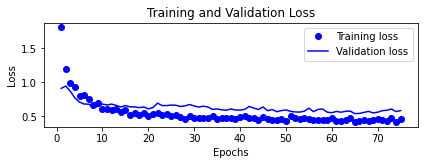

In [ ]:
def plot_acc_loss(x):  
  
  loss = x.history["loss"]
  val_loss = x.history["val_loss"]
 
  
  print("loss =", loss[-1])
  print("val_loss =", val_loss[-1])
  epochs = range(1, len(loss) + 1)
  fig = plt.figure()
  

  plt.subplot(2,1,2)
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  fig.tight_layout()
  plt.show()
  
  

plot_acc_loss(history)

In [ ]:
y_pred = model.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0: "tahminler"})
y_pred = y_pred.astype("int64")
labels = df_test.ort11
df_preds = pd.DataFrame(y_pred[:10])


df_labels = pd.DataFrame(labels[:10])
df_labels = df_labels.rename(columns={0: "gerçek notlar"})
df_labels = df_labels.reset_index()
df_labels = df_labels.iloc[:, -1:]


df_tahminler = pd.concat([df_preds, df_labels.reindex(df_preds.index)], axis=1)
df_tahminler

,tahminler,ort11
0,73,73
1,70,66
2,62,60
3,80,93
4,71,77
5,77,76
6,78,85
7,75,90
8,68,85
9,82,91


#Classification

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")
sifir_bir_duzelt("ortaokul_kurs")
sifir_bir_duzelt("ortaokul_ozelders")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def puan_olcegi(ort):
  for i in df[ort].index:
    #if df[ort][i] >=0 and df[ort][i] <= 49,99:
     # df[ort][i] = 0
    if df[ort][i] >=0 and df[ort][i] <= 49.99:
      df[ort][i] = 0
    elif df[ort][i] >= 50 and df[ort][i] <=59.99:
      df[ort][i] = 1
    elif df[ort][i] >= 60 and df[ort][i] <=69.99:
      df[ort][i] = 2
    elif df[ort][i] >= 70 and df[ort][i] <=84.99:
      df[ort][i] = 3
    elif df[ort][i] >= 85 and df[ort][i] <=100:
      df[ort][i] = 4

In [ ]:
puan_olcegi(ort = "ort9")
puan_olcegi(ort = "ort10")
puan_olcegi(ort = "ort11")
puan_olcegi(ort = "turkce9")
puan_olcegi(ort = "mat9")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-p

In [ ]:
df.iloc[:, -7:] = df.iloc[:, -7:].astype("int64")
df

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,1,1,2,3,3
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,1,0,2,3,3
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,3,4,3,4,0
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,1,0,2,2,2
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,3,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0,1,1,1,1,1,1,3,4,1,1,3,3,0,0,0,3,3,1,2,3,1,0,0,0,0,0,439,95,4,3,3,3,3
1080,0,1,1,1,1,1,1,5,6,0,1,4,3,0,0,3,2,2,2,2,3,0,1,1,0,0,0,426,91,3,3,3,3,3
1081,1,1,1,1,1,1,1,3,3,0,2,1,2,1,0,3,1,2,2,1,3,0,0,1,0,1,1,410,93,3,3,3,3,3
1082,0,1,1,1,1,1,1,3,4,0,1,2,3,0,0,2,3,1,2,1,2,0,0,0,0,0,0,407,95,2,2,3,3,3


In [ ]:
df.iloc[714].ort11

49

In [ ]:
df["ort11"][714] = 1

In [ ]:
df.iloc[714].ort11

1

In [ ]:
not49 = df.index[df['ort11'] == 49].tolist()
not49

[]

In [ ]:
x_reduced_col_names = df.corr().abs()["ort11"].nlargest(10).index
df[x_reduced_col_names].corr()

,ort11,ort10,turkce9,lgs_puani,mat9,ortaokul_puani,ders_calisma,cinsiyet,oyun,sosyal_kulturel
ort11,1.000000,0.707107,0.555615,0.504709,0.498066,0.443504,0.304803,-0.195336,-0.158540,-0.130238
ort10,0.707107,1.000000,0.618027,0.615708,0.600915,0.495947,0.318186,-0.159471,-0.174118,-0.126845
turkce9,0.555615,0.618027,1.000000,0.513132,0.549109,0.451844,0.274623,-0.185144,-0.194054,-0.086124
lgs_puani,0.504709,0.615708,0.513132,1.000000,0.543642,0.743584,0.230925,-0.013302,-0.071469,-0.052587
mat9,0.498066,0.600915,0.549109,0.543642,1.000000,0.429739,0.247471,-0.059783,-0.086491,-0.049212
ortaokul_puani,0.443504,0.495947,0.451844,0.743584,0.429739,1.000000,0.240453,-0.064464,-0.076150,-0.048008
ders_calisma,0.304803,0.318186,0.274623,0.230925,0.247471,0.240453,1.000000,-0.260115,-0.266336,-0.091883
cinsiyet,-0.195336,-0.159471,-0.185144,-0.013302,-0.059783,-0.064464,-0.260115,1.000000,0.425190,0.287557
oyun,-0.158540,-0.174118,-0.194054,-0.071469,-0.086491,-0.076150,-0.266336,0.425190,1.000000,0.131352
sosyal_kulturel,-0.130238,-0.126845,-0.086124,-0.052587,-0.049212,-0.048008,-0.091883,0.287557,0.131352,1.000000


In [ ]:
x = df[x_reduced_col_names]
x.dtypes

ort11              int64
ort10              int64
turkce9            int64
lgs_puani          int64
mat9               int64
ortaokul_puani     int64
ders_calisma       int64
cinsiyet           int64
oyun               int64
sosyal_kulturel    int64
dtype: object

In [ ]:
df_train = x.iloc[:800, :]
df_test = x.iloc[800:, :]

In [ ]:
x_train = df_train[df_train.columns.difference(['ort11'])].values
y_train = df_train[['ort11']].values
x_test = df_test[df_test.columns.difference(['ort11'])].values
y_test = df_test[["ort11"]].values

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
#y_train = sc_y.fit_transform(y_train)

In [ ]:
from keras.utils import to_categorical 
test_labels = to_categorical(y_train, dtype ="uint8", num_classes=5) 

In [ ]:
test_labels[1]

array([0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
model = Sequential()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(9, )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation= 'relu'))



model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.Adamax(lr=5e-4), loss='categorical_crossentropy', metrics=["acc"])
history = model.fit(x_train,test_labels, validation_split=0.03, batch_size=8, epochs=50)

Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 1.7569 - acc: 0.2228 - val_loss: 1.6003 - val_acc: 0.1250
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 1.5112 - acc: 0.3097 - val_loss: 1.5294 - val_acc: 0.1667
Epoch 3/50
97/97 [==============================] - 0s 2ms/step - loss: 1.4181 - acc: 0.3438 - val_loss: 1.4473 - val_acc: 0.2083
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 1.3445 - acc: 0.3847 - val_loss: 1.3626 - val_acc: 0.3333
Epoch 5/50
97/97 [==============================] - 0s 2ms/step - loss: 1.2544 - acc: 0.4428 - val_loss: 1.2826 - val_acc: 0.4167
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 1.2229 - acc: 0.4602 - val_loss: 1.2333 - val_acc: 0.3333
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 1.2098 - acc: 0.4695 - val_loss: 1.1885 - val_acc: 0.4583
Epoch 8/50
97/97 [==============================] - 0s 3ms/step - loss: 1.1855 - acc: 0.47

acc = 0.5270618796348572
val_acc =  0.5416666865348816
loss = 1.0838981866836548
val_loss = 1.0448883771896362


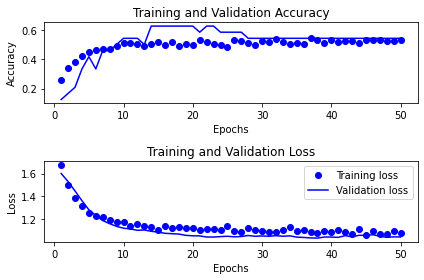

In [ ]:
def plot_acc_loss(x):  
  acc = x.history["acc"]
  val_acc = x.history["val_acc"]
  loss = x.history["loss"]
  val_loss = x.history["val_loss"]
  print("acc =", acc[-1])
  print("val_acc = ", val_acc[-1])
  print("loss =", loss[-1])
  print("val_loss =", val_loss[-1])
  epochs = range(1, len(acc) + 1)
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  fig.tight_layout()
  plt.show()

plot_acc_loss(history)

In [ ]:
pred_list = []
real_list = []

for i in np.arange(100):
  random=np.random.randint(1,100)
  data1 = x_test[random]


  y=model.predict(data1.reshape(1,9))
      
  predict_ind=np.argmax(y)
  
  pred_list.append(predict_ind)
  real_list.append(int(y_test[random]))

df_preds = pd.DataFrame(pred_list)
df_preds = df_preds.rename(columns={0: "tahminler"})
df_real = pd.DataFrame(real_list)
df_real = df_real.rename(columns={0: "gerçek notlar"})

df_tahminler = pd.concat([df_preds, df_real.reindex(df_preds.index)], axis=1)

In [ ]:
def not_duzelt(degisken):
  for i in df_tahminler[degisken].index:
    if df_tahminler[degisken][i] ==0:
      df_tahminler[degisken][i] = 1
    elif df_tahminler[degisken][i]==1:
      df_tahminler[degisken][i]=2
    elif df_tahminler[degisken][i]==2:
      df_tahminler[degisken][i]=3
    elif df_tahminler[degisken][i]==3:
      df_tahminler[degisken][i]=4
    elif df_tahminler[degisken][i]==4:
      df_tahminler[degisken][i]=5

In [ ]:
not_duzelt("tahminler")

In [ ]:
not_duzelt("gerçek notlar")

In [ ]:
df_tahminler

,tahminler,gerçek notlar
0,4,4
1,5,4
2,5,4
3,4,4
4,4,4
...,...,...
95,5,4
96,4,5
97,5,4
98,5,5


#Confusion Matrix

In [ ]:
results = confusion_matrix(real_list, pred_list)
print(results)

[[ 0  0  2  0  0]
 [ 0  0  2  1  0]
 [ 0  0  3 14  0]
 [ 0  0  1 35 10]
 [ 0  0  0 11 21]]


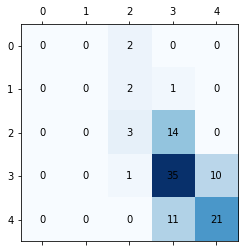

In [ ]:
fig, ax = plt.subplots()

ax.matshow(results, cmap = plt.cm.Blues)

for i in range(5):
  for j in range(5):
    c = results[j, i]
    ax.text(i, j, str(c), va="center", ha="center")

#plt.imshow(results, cmap='hot', interpolation='nearest', display_labels)
#plt.show()